In [1]:
from greedy_mcmc_attack import *
from data_collection.recordings import *
import sys
sys.path.append("../../")
from src.models.gcn import *
from src.models.gat import *
from src.models.gsage import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Cora')
data = cora_dataset[0].to(device)
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [4]:
edges_to_add = None

In [5]:
model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [6]:
model_save_path = "../models/cora_gcn_model.pth"
list_save_path = "../attacks/cora_gcn_edges.pth"
# # multi_metattack_edges_list.pth
# list_save_path = "multi_metattack_edges_list.pth"

In [7]:
model, edges_to_add, train = load_model_and_edges(model_save_path, list_save_path, model, device)

In [8]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.759
Initial Loss: 1.9119181632995605


In [9]:
G, initial_edge_count, ptb_rate, budget = initialize(data, _ptb_rate=0.15)

In [10]:
full_metattack_acc, full_metattack_loss, full_metattack_itrs = two_phase_attack_mcmc(data, train, model, 0.0, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

In [11]:
# splits = [0.0, 0.5, 0.7, 0.9]
# # splits = [0.9]
# # split_dic_acc = defaultdict(list)
# # split_dic_loss = defaultdict(list)
# # itrs_one = defaultdict(int)

In [12]:
# for s in splits:
#     if s == 0.0:
#         split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
#     else:
#         split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=True, verbose=True)

In [13]:
# record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.REVERSED)
# record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"constant"}_{"binary"}_{"reversed"}_results.pkl')

In [14]:
# plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "reversed")

In [15]:
# plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "reversed")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [16]:
# split_dic_decreasing_acc = defaultdict(list)
# itrs_two = defaultdict(int)
# split_dic_decreasing_loss = defaultdict(list)

In [17]:
# for s in splits:
#     if s == 0.0:
#         split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
#     else:
#         split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=True, verbose=True)

In [18]:
# record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GCN, Dataset.CORA, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.REVERSED)
# record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"increasing"}_{"binary"}_{"reversed"}_results.pkl')

In [19]:
# plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "reversed")

In [20]:
# plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "reversed")

In [21]:
# split_dic_decreasing_constant_acc = defaultdict(list)
# split_dic_decreasing_constant_loss = defaultdict(list)
# itrs_three = defaultdict(int)

In [22]:
# for s in splits:
#     if s == 0.0:
#         split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
#     else:
#         split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=True, verbose=True)

In [23]:
# record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
# record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"constant"}_{"decaying"}_{"reversed"}_results.pkl')

In [24]:
# plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "reversed")

In [25]:
# plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "reversed")

In [26]:
# split_dic_decreasing_gradual_acc = defaultdict(list)
# split_dic_decreasing_gradual_loss = defaultdict(list)
# itrs_four = defaultdict(int)

In [27]:
# for s in splits:
#     if s == 0.0:
#         split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
#     else:
#         split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=True, verbose=True)

In [28]:
# record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
# record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"increasing"}_{"decaying"}_{"reversed"}_results.pkl')

In [29]:
# plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

In [30]:
# plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

# regular, secondary attack, not reversed

In [31]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [32]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.0022449493408203125, master_dirty_delta: -0.0022450685501098633
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: -0.0007562637329101562
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.0, master_dirty_delta: -1.1920928955078125e-07
Attempt: 3, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -4.76837158203125e-07, master_dirty_delta: -2.384185791015625e-07
Attempt: 4, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.00013315677642822266, master_dirty_delta: 0.0001329183578491211
Attempt: 18, Selected: 10
Attempt: 19, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.003553628921508789, master_dirty_delta: 0.026262760162353516
Attempt: 35, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.0028809309005737305, master_dirty_delta: 0.028

Peturbing graph...:   0%|          | 0/202 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.0022449493408203125, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: 0.005961418151855469
Attempt: 15, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.00722193717956543, master_dirty_delta: 0.031745314598083496
Attempt: 31, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: -0.0011736154556274414, master_dirty_delta: 0.026721596717834473
Attempt: 45, Selected: 30
max_change: 0.019119181632995606, master_clean_delta: -0.006592512130737305, master_dirty_delta: 0.020760536193847656
Attempt: 57, Selected: 40
max_change: 0.019119181632995606, master_clean_delta: -0.013965010643005371, master_dirty_delta: 0.013139605522155762
Attempt: 69, Selected: 50
max_change: 0.019119181632995606, master_clean_delta: 0.00015091896057128906, master_dirty_delta: 0.02436614036560

Peturbing graph...:   0%|          | 0/122 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.002245187759399414, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853487014770508, master_dirty_delta: 0.005961418151855469
Attempt: 14, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.00918734073638916, master_dirty_delta: 0.027801036834716797
Attempt: 30, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.0062007904052734375, master_dirty_delta: 0.025475263595581055
Attempt: 43, Selected: 30
max_change: 0.019119181632995606, master_clean_delta: 0.002743363380432129, master_dirty_delta: 0.022296905517578125
Attempt: 58, Selected: 40
max_change: 0.019119181632995606, master_clean_delta: -0.001367330551147461, master_dirty_delta: 0.020570039749145508
Attempt: 59, Selected: 40
max_change: 0.019119181632995606, master_clean_delta: 0.0017946958541870117, master_dirty_delta: 0.02373194694519043


Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [33]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"constant"}_{"binary"}_{"attacked"}_results.pkl')

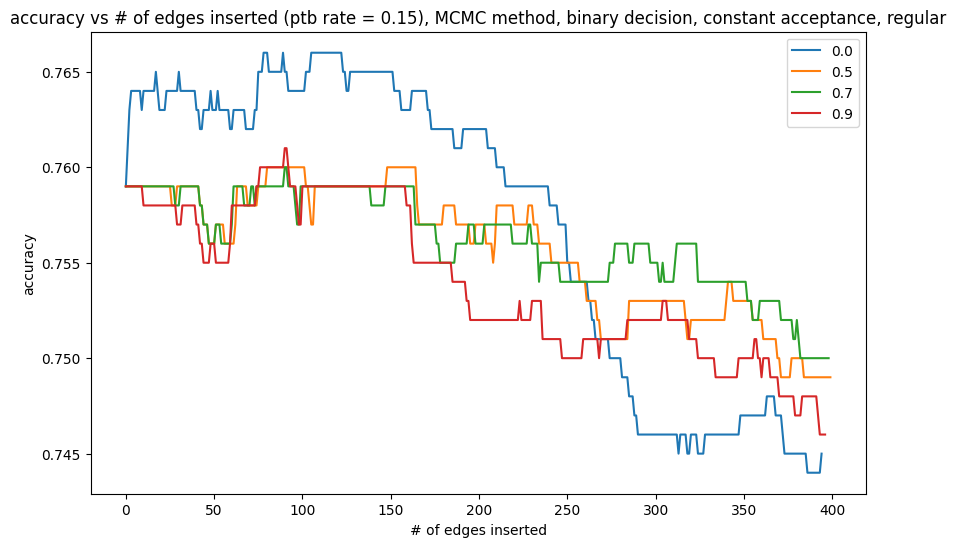

In [34]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "regular")

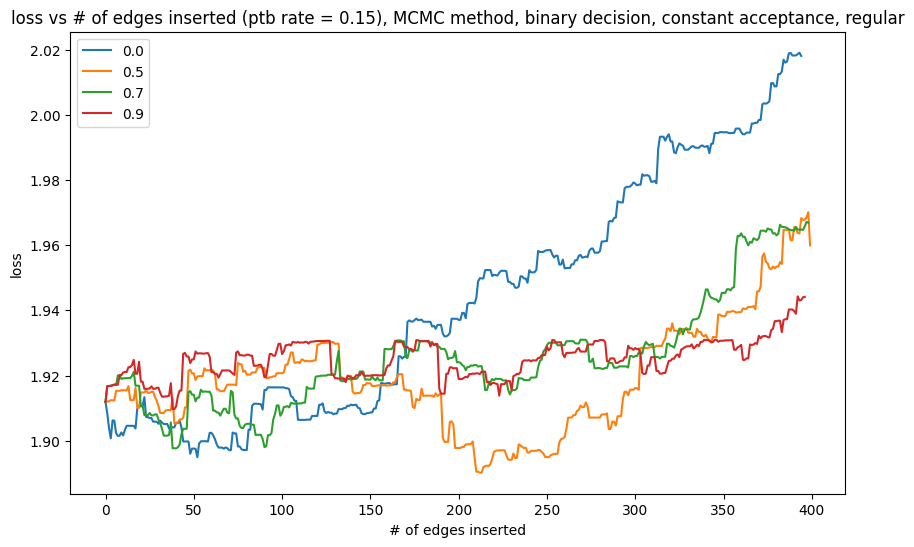

In [35]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "regular")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [36]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [37]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.002245187759399414, master_dirty_delta: -0.0022450685501098633
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: -0.0007561445236206055
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 18, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.00020384788513183594, master_dirty_delta: 0.0009764432907104492
Attempt: 41, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.0010352134704589844, master_dirty_delta: 0.0025904178619384766
Attempt: 55, Selected: 30
max_change: 0.019119181632995606, master_clean_delta: -0.0014376640319824219, master_dirty_delta: -0.00024759769439697266
Attempt: 56, Selected: 30
max_change: 0.019119181632995606, master_clean_delta: -0.0025703907012939453, master_dirty_delta: -0.00019824504852294922
Attempt: 57, Select

Peturbing graph...:   0%|          | 0/202 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.0022449493408203125, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: 0.00596165657043457
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0
Attempt: 3, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -3.5762786865234375e-07, master_dirty_delta: 0.0
Attempt: 4, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.0, master_dirty_delta: 0.0002646446228027344
Attempt: 30, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: -0.00010836124420166016, master_dirty_delta: 0.001034855842590332
Attempt: 49, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.0003509521484375, master_dirty_delta: 0.0007506608963012695
Attempt: 67, Selected: 30
max_change: 0.0191191816

Peturbing graph...:   0%|          | 0/123 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.002245187759399414, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: 0.005961418151855469
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 19, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.0007395744323730469, master_dirty_delta: 0.0012453794479370117
Attempt: 20, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 7.653236389160156e-05, master_dirty_delta: 0.0005824565887451172
Attempt: 21, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 7.82012939453125e-05, master_dirty_delta: 0.0005841255187988281
Attempt: 22, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.0010724067687988281, master_dirty_delta: 0.0013036727905273438
Attempt: 23, Selected: 10
max_

Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [38]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GCN, Dataset.CORA, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"increasing"}_{"binary"}_{"attacked"}_results.pkl')

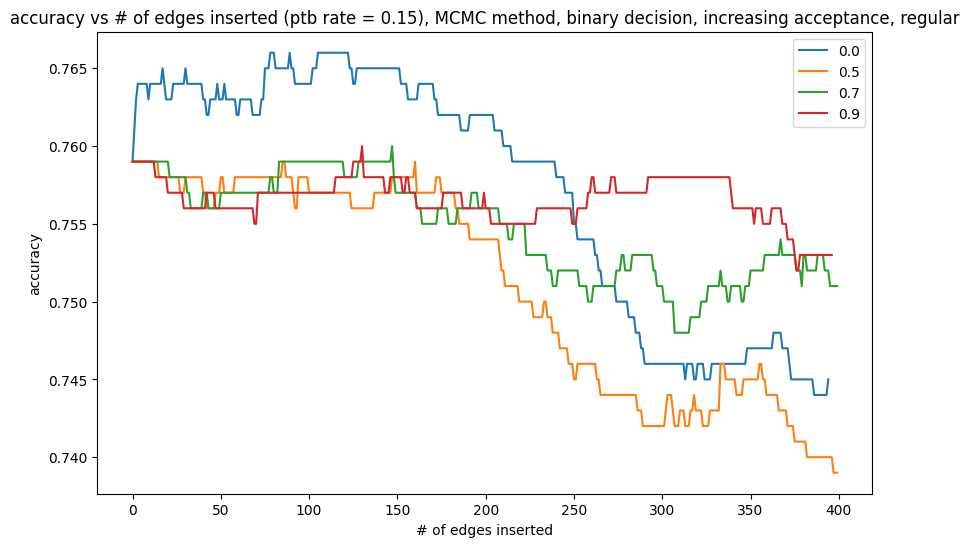

In [39]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "regular")

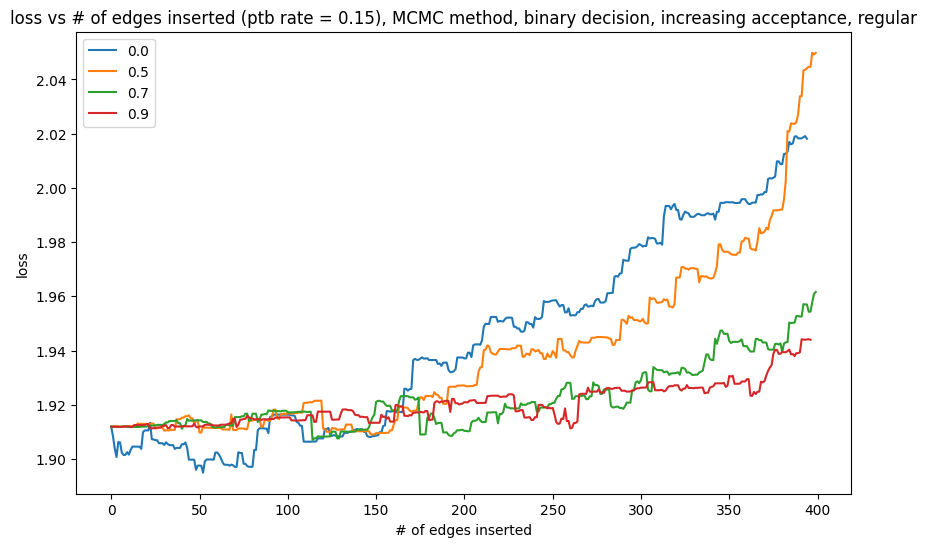

In [40]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "regular")

In [41]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [42]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.002245306968688965, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853248596191406, master_dirty_delta: -0.0007562637329101562
Attempt: 2, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0, master_dirty_delta: -1.1920928955078125e-07
Attempt: 3, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -4.76837158203125e-07, master_dirty_delta: -4.76837158203125e-07
Attempt: 4, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0001329183578491211, master_dirty_delta: 0.0001329183578491211
Attempt: 23, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.004297852516174316, master_dirty_delta: 0.027219772338867188
Attempt: 24, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.0005568265914916992, master_dirty_delta: 0.02445375919342041
Attempt: 25, Selected: 10
max

Peturbing graph...:   0%|          | 0/203 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.002245187759399414, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: 0.005961418151855469
Attempt: 19, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.007886767387390137, master_dirty_delta: 0.032431960105895996
Attempt: 43, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.014875292778015137, master_dirty_delta: 0.04125010967254639
Attempt: 44, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.013291597366333008, master_dirty_delta: 0.040177106857299805
Attempt: 45, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.013712286949157715, master_dirty_delta: 0.041309356689453125
Attempt: 77, Selected: 30
max_change: 0.019119181632995606, master_clean_delta: 0.01910531520843506, master_dirty_delta: 0.047026753425598145
Att

Peturbing graph...:   0%|          | 0/122 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.0022449493408203125, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853487014770508, master_dirty_delta: 0.005961418151855469
Attempt: 14, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.0034629106521606445, master_dirty_delta: 0.004704952239990234
Attempt: 42, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.009724259376525879, master_dirty_delta: 0.010705709457397461
Attempt: 62, Selected: 30
max_change: 0.019119181632995606, master_clean_delta: 0.01870548725128174, master_dirty_delta: 0.021474361419677734
Attempt: 90, Selected: 40
max_change: 0.019119181632995606, master_clean_delta: 0.01902008056640625, master_dirty_delta: 0.021422147750854492
Attempt: 91, Selected: 40
max_change: 0.019119181632995606, master_clean_delta: 0.019457221031188965, master_dirty_delta: 0.019587278366088867
A

Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [43]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"constant"}_{"decaying"}_{"attacked"}_results.pkl')

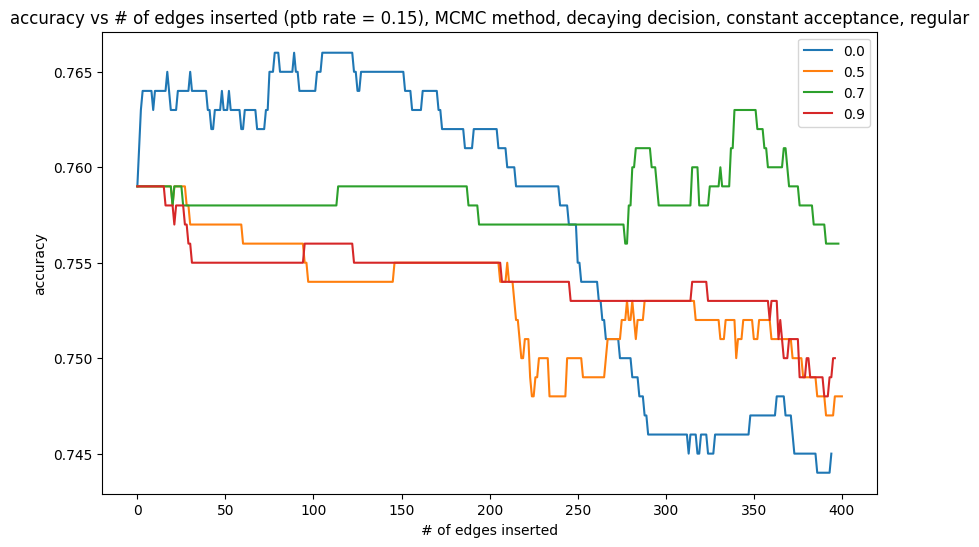

In [44]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "regular")

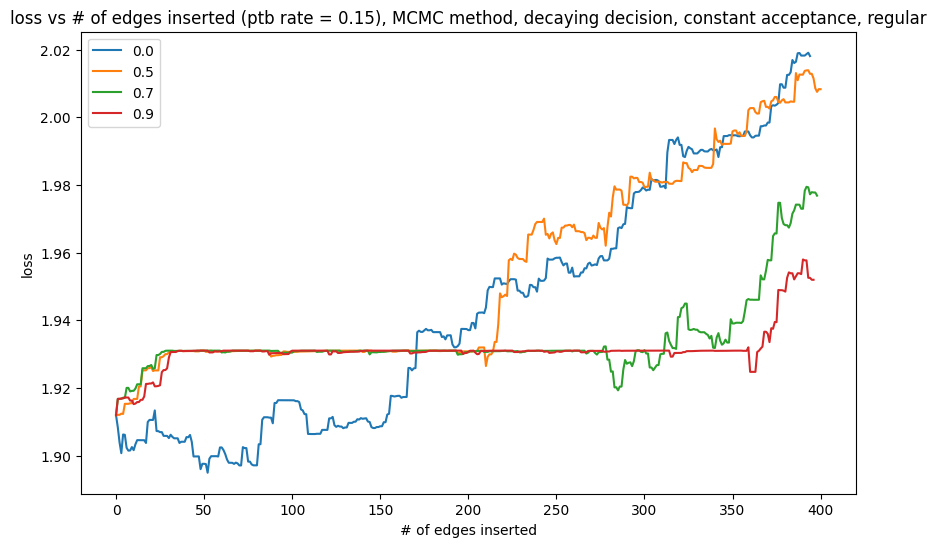

In [45]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "regular")

In [46]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [47]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.0022450685501098633, master_dirty_delta: -0.0022454261779785156
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853248596191406, master_dirty_delta: -0.0007561445236206055
Attempt: 2, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -1.1920928955078125e-07, master_dirty_delta: -1.1920928955078125e-07
Attempt: 3, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -4.76837158203125e-07, master_dirty_delta: -3.5762786865234375e-07
Attempt: 4, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.00013315677642822266, master_dirty_delta: 0.0001327991485595703
Attempt: 5, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0, master_dirty_delta: 1.0251998901367188e-05
Attempt: 31, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: -2.6941299438476562e-05, master_dirty_delta: 0.0016849040985107422
Attempt: 62, Sele

Peturbing graph...:   0%|          | 0/202 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.0022450685501098633, master_dirty_delta: -0.0022450685501098633
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853367805480957, master_dirty_delta: 0.0059615373611450195
Attempt: 2, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 31, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 4.0411949157714844e-05, master_dirty_delta: 0.0012178421020507812
Attempt: 32, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: -0.006082892417907715, master_dirty_delta: -0.0033664703369140625
Attempt: 33, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.0007299184799194336, master_dirty_delta: 0.0002560615539550781
Attempt: 34, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 4.0650367736816406e-05, master_dirty_delta: 0.0012177228927612305
Attempt: 35, Selected: 10
max_change:

Peturbing graph...:   0%|          | 0/123 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.002245187759399414, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853487014770508, master_dirty_delta: 0.005961179733276367
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0
Attempt: 3, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -3.5762786865234375e-07, master_dirty_delta: -3.5762786865234375e-07
Attempt: 4, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.00013315677642822266, master_dirty_delta: 0.00013303756713867188
Attempt: 5, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.0, master_dirty_delta: 0.0002645254135131836
Attempt: 45, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: -0.0009456872940063477, master_dirty_delta: -0.0033211708068847656
Attempt: 46, Selected: 10


Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [48]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"increasing"}_{"decaying"}_{"attacked"}_results.pkl')

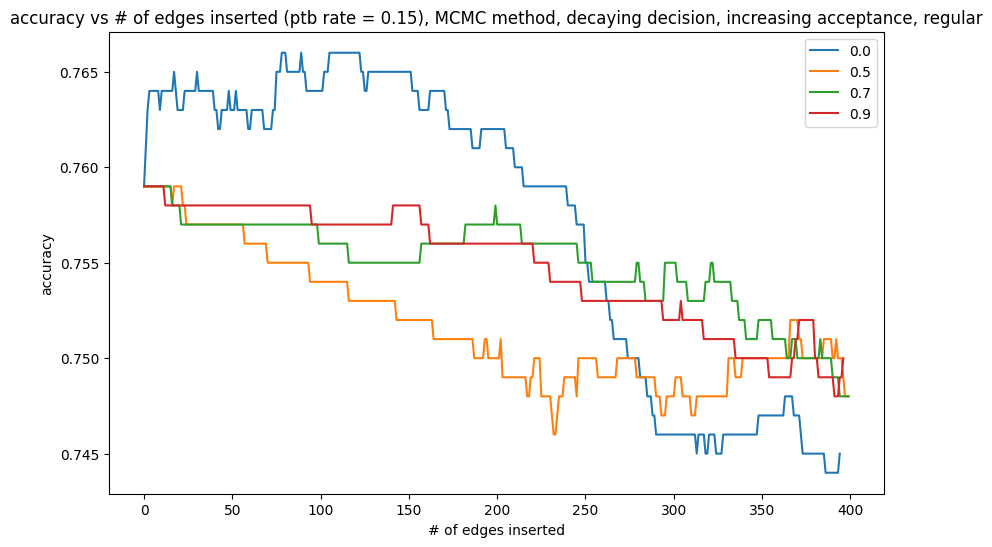

In [49]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")

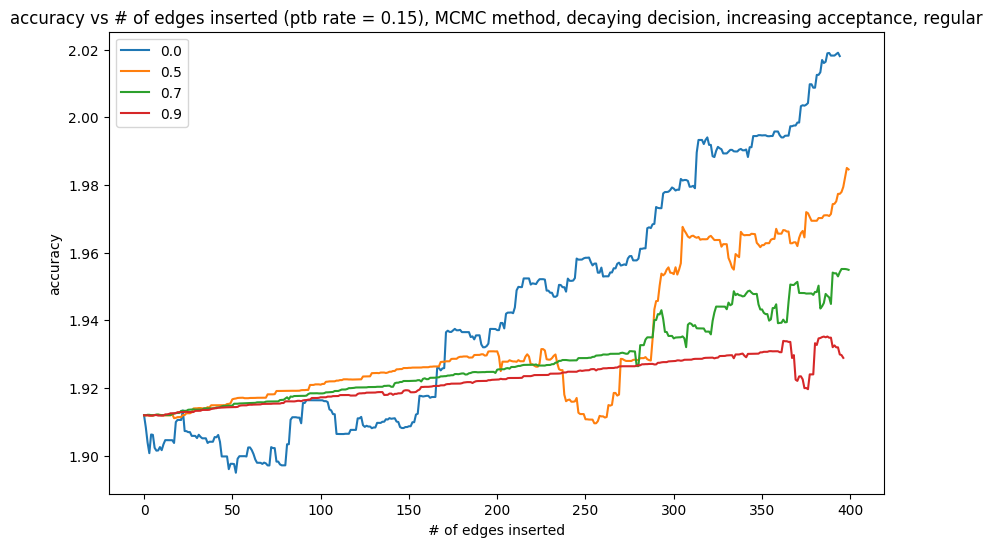

In [50]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")